Importing the Dependencies

In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression
 from sklearn import metrics
 

Data collection and Analysis

In [ ]:
#loading the data from csv file to a pandas dataframe
insurance_dataset= pd.read_csv("insurance (2).csv")

In [ ]:
#first five rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
#getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features:

-sex
-smoker
-Region

In [ ]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [ ]:
#statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Distribution of age value

In [1]:

sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'])
plt.title('age Distribution')
plt.show()

NameError: name 'sns' is not defined

Distribution of sex value

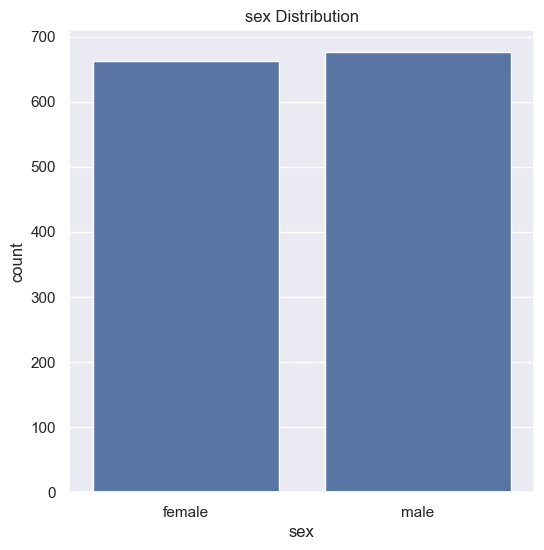

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Distribution of bmi value

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'])
plt.title('bmi Distribution')
plt.show()

NameError: name 'insurance_dataset' is not defined

<Figure size 600x600 with 0 Axes>

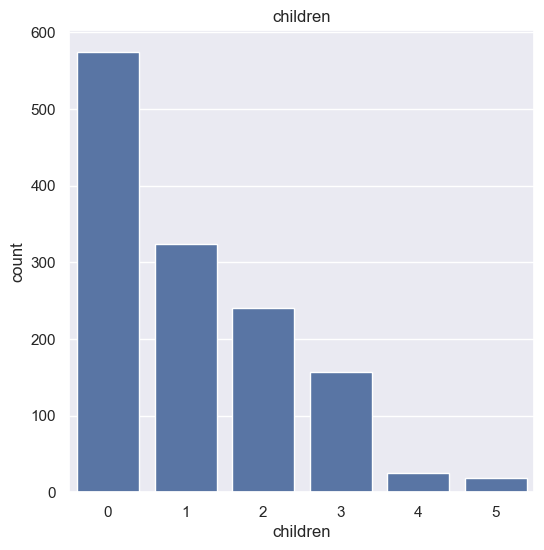

In [ ]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

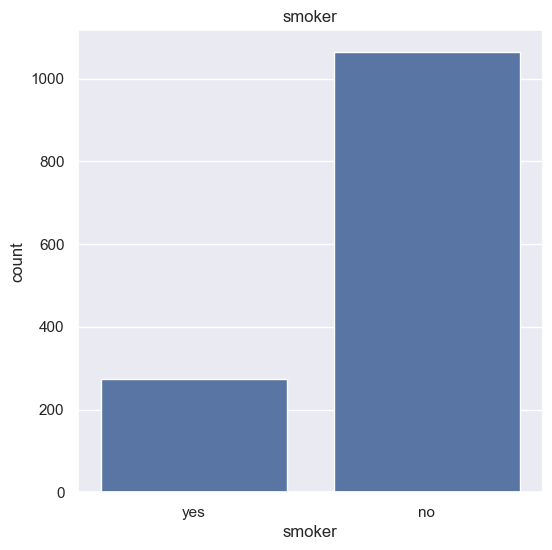

In [ ]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

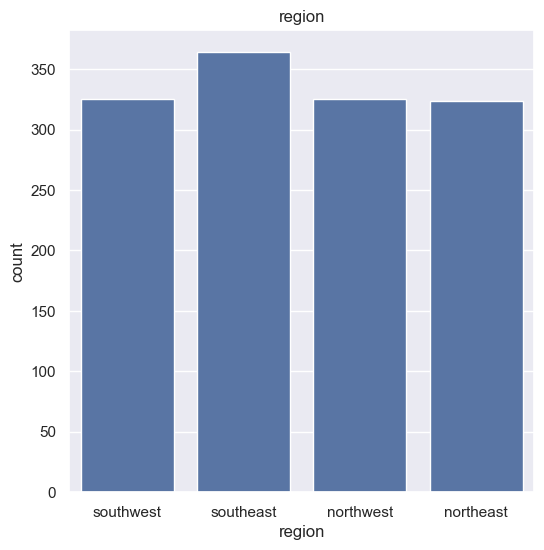

In [ ]:
#Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\desin\AppData\Local\Temp\ipykernel_25824\2913342715.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


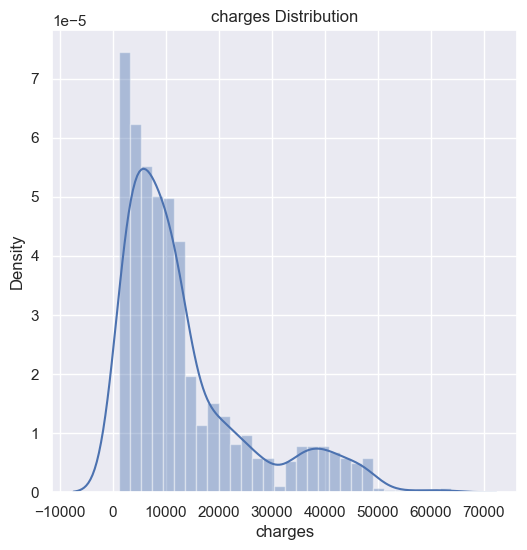

In [ ]:
#distribution of charges
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges Distribution')
plt.show()

Data preprocessing


Encoding the categorical features

In [ ]:
insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)



C:\Users\desin\AppData\Local\Temp\ipykernel_25824\669770105.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)
C:\Users\desin\AppData\Local\Temp\ipykernel_25824\669770105.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\desin\AppData\Local\Temp\ipykernel_25824\669770105.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

splitting the features and target

In [ ]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Split the data into training data and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training


Linear Regression

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
training_data_prediction=regressor.predict(X_train)

In [ ]:
test_data_prediction=regressor.predict(X_test)

In [ ]:
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared value :',r2_test)

R squared value : 0.7447273869684077


Building a predictive system

In [ ]:
input_data=(31,1,25.74,0,1,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD',prediction[0])

[3760.0805765]
The insurance cost is USD 3760.0805764960523


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


predict charges for new customers

In [ ]:
data={'age':32,
       'sex':0,
        'bmi':28.880,
        'children':0,   
         'smoker':1,
          'region':3}
df =pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,32,0,28.88,0,1,3


In [ ]:
new_pred=regressor.predict(df)
print(new_pred)

[5660.26542737]


save model using joblib

In [ ]:
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression()

In [ ]:
import joblib

In [ ]:
joblib.dump(regressor,"model_joblib_regressor")

['model_joblib_regressor']

In [ ]:
model=joblib.load('model_joblib_regressor')

In [ ]:
model.predict(df)

array([5813.10166372])



GUI

In [ ]:
from tkinter import *

In [ ]:
import joblib

In [ ]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    model=joblib.load('model_joblib_regressor')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])
    Label(master, text="insurance cost").grid(row=7)
    Label(master,text=result).grid(row=8)
    
master =Tk()
master.title("insurance cost prediction")
label=Label(master,text="Insurance cost prediction",bg="black",fg="white").grid(row=0,columnspan=2)
Label(master,text="enter your age").grid(row=1)
Label(master,text="Male or Female [1/0]").grid(row=2)
Label(master,text="enter your bmi value").grid(row=3)
Label(master,text="enter number of children").grid(row=4)
Label(master,text="smoker  yes/no [1/0]").grid(row=5) 
Label(master,text="region [1-4]").grid(row=6)


e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)


Button(master,text="predict",command=show_entry).grid()



mainloop()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
